In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m1 = 10**4
m2 = 10**4
G = 1


R = 20
x1 = 0
x2 = 20
r1_before = np.array([x1,0])
r2_before = np.array([x2,0])

rcm = (r2_before*m2+r1_before*m1)/(m2+m1)

r1 = r1_before-rcm

r2 = r2_before-rcm

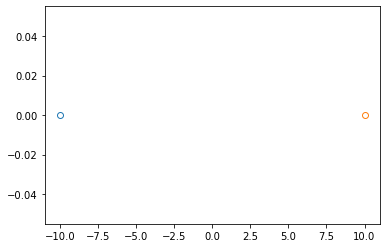

In [3]:
plt.plot([r1[0]],[r1[1]],"o",mfc="w")
plt.plot([r2[0]],[r2[1]],"o",mfc="w")

In [4]:
miu = m1*m2/(m1+m2)
omega = np.sqrt(G*m1*m2/miu/R**3)
x1 = r1[0]
y1 = r1[1]
vx1 = -omega*y1
vy1 = omega*x1

x2 = r2[0]
y2 = r2[1]
vx2 = -omega*y2
vy2 = omega*x2

v1 = np.array([vx1,vy1])
v2 = np.array([vx2,vy2])
Y = np.concatenate((r1,v1,r2,v2))
y0 = np.copy(Y)
print(y0)

[-10.          0.         -0.        -15.8113883  10.          0.
  -0.         15.8113883]


In [5]:
def KeplerODE(t,y):
    global m2, m1, G
    r1 = y[0:2]
    v1 = y[2:4]
    r2 = y[4:6]
    v2 = y[6:8]
    
    drdt_1 = v1
    drdt_2 = v2
    
    F1 = (-m1*m2*G / np.linalg.norm(r1-r2)**3 * (r1-r2))
    F2 = (-m2*m1*G / np.linalg.norm(r2-r1)**3 * (r2-r1)) 
    
    a_1 = F1/m1
    a_2 = F2/m2
    
    dvdt_1 = a_1
    dvdt_2 = a_2
    
    return np.concatenate((drdt_1,dvdt_1,drdt_2,dvdt_2))

In [6]:
P = np.sqrt((4*(np.pi**2) / (G*(m1+m2)))*(R**3))

print(P)

3.9738353063184406


In [7]:
t = 0 
tMax = P/4
dt = P/1000
n = tMax/dt

tt = []
xt_1 = []
yt_1 = []

xt_2 = []
yt_2 = []

y8 = np.copy(Y)
print(y8)

[-10.          0.         -0.        -15.8113883  10.          0.
  -0.         15.8113883]


In [11]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title='Final_Project_Shan', artist='Matplotlib',comment='Wakanda is coming.')
writer = FFMpegWriter(fps=15, metadata=metadata)
%matplotlib osx
x1 = r1[0]
y1 = r1[1]
vx1 = -omega*y1
vy1 = omega*x1

x2 = r2[0]
y2 = r2[1]
vx2 = -omega*y2
vy2 = omega*x2

v1 = np.array([vx1,vy1])
v2 = np.array([vx2,vy2])* 1.6
vcm = (m1 * v1 + m2 * v2) / (m1 + m2)
v1 = v1 - vcm
v2 = v2 - vcm
Y = np.concatenate((r1,v1,r2,v2))

y8 = np.copy(Y)
print(y8)
t = 0
# tt = []
# xt_1 = []
# yt_1 = []

# xt_2 = []
# yt_2 = []
fig = plt.figure(figsize= (8,8)  )
tMax = P

with writer.saving(fig, "Final_Shan_1.6_New.mp4", dpi = 200):
    while (t<10*tMax):
        #plt.clf()
    #     tt.append(t)
    #     xt_1.append(y8[0])
    #     yt_1.append(y8[1])

    #     xt_2.append(y8[4])
    #     yt_2.append(y8[5])

        f1 = KeplerODE(t,     y8)
        f2 = KeplerODE(t+dt/2,y8+f1*dt/2)
        f3 = KeplerODE(t+dt/2,y8+f2*dt/2)
        f4 = KeplerODE(t+dt,  y8+f3*dt)

        y8 = y8 + (f1 + 2*f2 + 2*f3 + f4)/6*dt
        x1 = y8[0]
        y1 = y8[1]
        x2 = y8[4]
        y2 = y8[5]

        if t//dt % 10 ==0:
            plt.plot([x1],[y1],'o',mfc='w',color='g',label = 'star1')
            plt.plot([x2],[y2],'o',mfc='w',color='b',label = 'star2')
            plt.xlim(-3*R,3*R)
            plt.ylim(-3*R,3*R)
            writer.grab_frame()
            plt.pause(0.1)


        t = t + dt
# plt.plot(xt_1,yt_1,'g-', label = 'star1')
# plt.plot(xt_2,yt_2,'r-', label = 'star2')
# plt.plot()
# plt.gca().set_aspect('equal',adjustable = 'box')
# plt.legend()

[-10.           0.           0.         -20.55480479  10.
   0.           0.          20.55480479]
